<a href="https://colab.research.google.com/github/WilliamEstrela/1-Lista-POO-1/blob/master/Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

base = pd.read_csv('./Desktop/me/train.csv')



In [38]:
#verificando o percentual de valores nulos
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(10)


PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
GarageCond     0.055479
GarageType     0.055479
dtype: float64

In [39]:
#verificando e eliminando colunas com valores maiores que 10% vazios
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
base = base.drop(eliminar, axis = 1)


In [40]:
#selecionando apenas colunas numericas
colunas = base.columns[base.dtypes != 'object']

In [ ]:

#Selecioonando apenas colunas com valores numericos
base2 = base.loc[:,colunas]
base2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [42]:
#Verificando valores vazios
base2.isnull().sum().sort_values(ascending=False).head(3)


GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [ ]:
#Inserindo -1 nos valores vazios
base2 = base2.fillna(-1)

Criando o modelo

In [ ]:
#Separando as variaveis independentes e dependentes

#Removendo a coluna SalePrice 
x = base2.drop('SalePrice', axis=1)
#Pegando apenas a coluna SalePrice que é o target do modelo
y = base2.SalePrice


In [ ]:
#Importanto as bibliotecas para o modelo
from sklearn.model_selection import train_test_split

In [46]:
#Dividindo a base entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [47]:
#importando a regressão linear
from sklearn.linear_model import LinearRegression

In [48]:
#criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [49]:
#fazendo a previsão para os dados de teste
y_rl = reg_rl.predict(X_test)

In [50]:
#importando arvore de regressao
from sklearn import tree

In [51]:
#criando regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [52]:
# fazendo previsão
y_ar = reg_ar.predict(X_test)

In [53]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [54]:
#Criando regressor e fazendo fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [55]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

In [56]:
#Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [57]:
#Importando o erro médio quadrático
from sklearn.metrics import mean_squared_error

In [58]:
# Avaliando o erro da regressao
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.187393064723
1533982883.44486


In [59]:
#Avaliando erro da arvore de decisão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))


27580.78838174274
2530245114.701245


In [60]:
#Avaliando erro do knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


In [61]:
#Importando matplotlib
import matplotlib.pyplot as plt


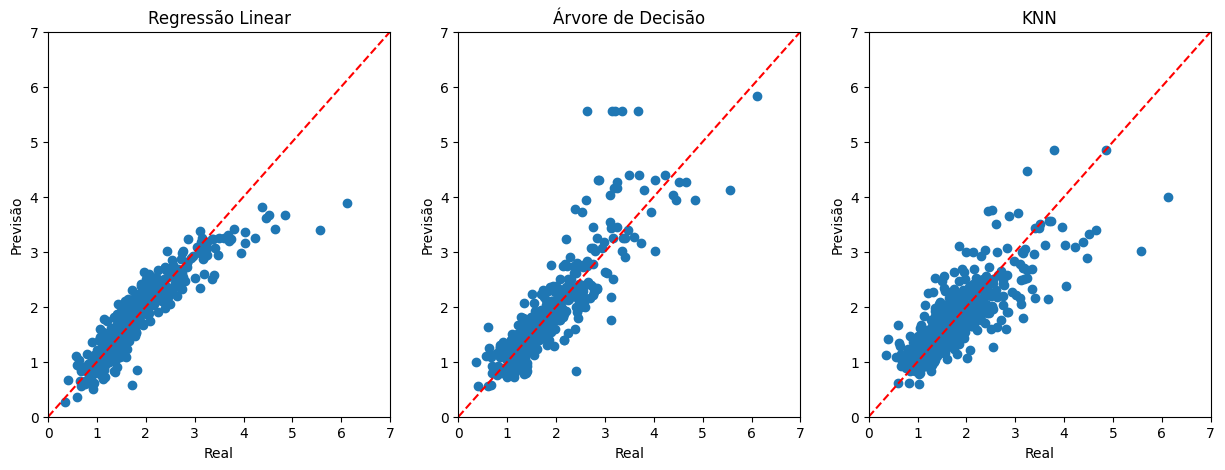

In [62]:
#Criando gráfico
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000) # regressao
ax[0].set_title('Regressão Linear')
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000) # arvore de decisao
ax[1].set_title('Árvore de Decisão')
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000) # knn
ax[2].set_title('KNN')
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()


# Fazendo a previsão para base de testes da competição

In [64]:
# Importanto a base de testes
teste = pd.read_csv('./Desktop/me/test.csv')

#Visualizando a base de teste
teste.head(3)
#Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)
#Verificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != 'object']

#Mantendo também apenas as colunas numerocas
teste2 = teste.loc[:,colunas2]

#Visualizando quantidade de valores nulos
teste2.isnull().sum().sort_values(ascending=False)

#Substituindo valores vazios por -1
teste2 = teste2.fillna(-1)

# Usando regressao linear para fazer previsão
y_pred = reg_rl.predict(teste2)

# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

# Extrair o Id e o SalePreice
resultado = teste[['Id','SalePrice']]

# Exportando essa base
resultado.to_csv('./Desktop/me/resultado.csv', index=False)